In [2]:
# import importlib
# import subprocess

# def import_or_install(package):
#             try:
#                 importlib.import_module(package)
#                 print(f'{package} is already installed')
#             except ImportError:
#                 print(f'{package} is not installed, installing now...')
#                 subprocess.check_call(['pip', 'install', package])
#                 print(f'{package} has been installed')

# import_or_install('pandas')
# import_or_install('scikit-learn')
# import_or_install('numpy')
# import_or_install('tensorflow')
# import_or_install('keras')

import pandas as pd
import pandas_market_calendars as mcal
from dateutil import parser
pd.set_option('display.max_columns', None)
from datetime import date, datetime, timedelta
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np

ModuleNotFoundError: No module named 'pandas_market_calendars'

In [2]:
try:
    data = pd.read_csv('../data/AAPL_cleaned_data.csv')
except:
    data = pd.read_csv('~/Documents/GitHub/Finance-LLM/data/cleaned_data.csv')
data_original = data.copy()
data.head(3)

,date,close,volume,day,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct
0,2018-05-11,45.120,104848800.0,4.0,0.297,0.206,0.091,60.598,55.270,55.270,46.462,46.462,72.887,72.887,20.424,95.332,95.332,43.543,43.543,43.543,43.543,12.65,119.23,101.41,83.16,148755.0,1.7,3.8,203.2,250.792,7.324,0.6825,0.6725,1.487
1,2018-05-14,45.015,83115200.0,0.0,0.302,0.227,0.074,37.773,49.438,49.438,47.454,47.454,53.406,53.406,12.318,92.491,92.491,43.691,43.691,43.691,43.691,12.93,118.60,101.19,83.16,148755.0,1.7,3.8,203.2,250.792,6.750,0.6825,0.6725,1.487
2,2018-05-15,44.606,94780800.0,1.0,0.279,0.239,0.040,25.000,41.292,41.292,45.400,45.400,33.076,33.076,4.629,82.234,82.234,43.774,43.774,43.774,43.774,14.63,117.25,100.63,83.11,148755.0,1.7,3.8,203.2,250.792,7.333,0.6825,0.6725,1.487


In [3]:
data_original.tail()

,date,close,volume,day,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct
1248,2023-04-27,168.41,64902300.0,3.0,2.367,2.683,-0.316,97.396,62.910,62.910,61.696,61.696,65.339,65.339,1.784,64.084,64.084,157.616,157.616,150.487,150.487,17.03,104.77,98.99,82.09,155673.0,4.83,3.4,257.381,302.918,7.833,1.88,1.94,-3.0928
1249,2023-04-28,169.68,55209200.0,4.0,2.560,2.658,-0.098,97.588,74.470,74.470,65.954,65.954,91.501,91.501,1.953,66.138,66.138,157.903,157.903,150.612,150.612,15.78,106.46,99.73,82.18,155673.0,4.83,3.4,257.381,302.918,7.583,1.88,1.94,-3.0928
1250,2023-05-01,169.59,52472900.0,0.0,2.675,2.662,0.013,88.758,79.233,79.233,70.380,70.380,96.937,96.937,1.928,65.851,65.851,158.221,158.221,150.721,150.721,16.08,103.13,98.32,81.81,155673.0,4.83,3.4,257.381,302.918,7.200,1.88,1.94,-3.0928
1251,2023-05-02,168.54,48425700.0,1.0,2.650,2.659,-0.009,75.033,77.833,77.833,72.864,72.864,87.769,87.769,1.663,62.442,62.442,158.540,158.540,150.816,150.816,17.78,105.70,99.60,82.08,155673.0,4.83,3.4,257.381,302.918,5.429,1.88,1.94,-3.0928
1252,2023-05-03,167.45,65136000.0,2.0,2.514,2.630,-0.116,57.266,70.977,70.977,72.235,72.235,68.461,68.461,1.441,59.026,59.026,158.920,158.920,150.921,150.921,18.34,106.29,100.25,82.28,155673.0,4.83,3.4,257.381,302.918,3.500,1.88,1.94,-3.0928


In [4]:
data.columns

Index(['date', 'close', 'volume', 'day', 'macd', 'macds', 'macdh', 'rsv_9',
       'kdjk_9', 'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'rs_14', 'rsi_14',
       'rsi', 'close_50_sma', 'ma50', 'close_200_sma', 'ma200', 'vix', 'TLT',
       'IEF', 'SHY', 'NFP', 'InterestRate', 'UnemploymentRate', 'PPI', 'CPI',
       'benz_rate', 'reportedEPS', 'estimatedEPS', 'surprisePct'],
      dtype='object')

In [5]:
# Preprocess encoding date using sin and cos functions
data['date'] = pd.to_datetime(data['date'])
data['month_sin'] = np.sin(2*np.pi*data['date'].dt.month/12)
data['month_cos'] = np.cos(2*np.pi*data['date'].dt.month/12)
data['day_of_month_sin'] = np.sin(2*np.pi*data['date'].dt.day/31)
data['day_of_month_cos'] = np.cos(2*np.pi*data['date'].dt.day/31)
data['day_of_week_sin'] = np.sin(2*np.pi*data['day']/5)
data['day_of_week_cos'] = np.cos(2*np.pi*data['day']/5)
data = data.drop('day', axis=1)
data.head()

,date,close,volume,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos
0,2018-05-11,45.120,104848800.0,0.297,0.206,0.091,60.598,55.270,55.270,46.462,46.462,72.887,72.887,20.424,95.332,95.332,43.543,43.543,43.543,43.543,12.65,119.23,101.41,83.16,148755.0,1.7,3.8,203.2,250.792,7.324,0.6825,0.6725,1.487,0.5,-0.866025,0.790776,-0.612106,-0.951057,0.309017
1,2018-05-14,45.015,83115200.0,0.302,0.227,0.074,37.773,49.438,49.438,47.454,47.454,53.406,53.406,12.318,92.491,92.491,43.691,43.691,43.691,43.691,12.93,118.60,101.19,83.16,148755.0,1.7,3.8,203.2,250.792,6.750,0.6825,0.6725,1.487,0.5,-0.866025,0.299363,-0.954139,0.000000,1.000000
2,2018-05-15,44.606,94780800.0,0.279,0.239,0.040,25.000,41.292,41.292,45.400,45.400,33.076,33.076,4.629,82.234,82.234,43.774,43.774,43.774,43.774,14.63,117.25,100.63,83.11,148755.0,1.7,3.8,203.2,250.792,7.333,0.6825,0.6725,1.487,0.5,-0.866025,0.101168,-0.994869,0.951057,0.309017
3,2018-05-16,45.022,76732400.0,0.282,0.248,0.034,15.719,32.768,32.768,41.189,41.189,15.925,15.925,5.313,84.159,84.159,43.878,43.878,43.878,43.878,13.42,116.80,100.42,83.11,148755.0,1.7,3.8,203.2,250.792,6.333,0.6825,0.6725,1.487,0.5,-0.866025,-0.101168,-0.994869,0.587785,-0.809017
4,2018-05-17,44.737,69176000.0,0.264,0.251,0.013,-70.464,-1.643,-1.643,26.912,26.912,-58.752,-58.752,3.533,77.939,77.939,43.944,43.944,43.944,43.944,13.43,116.21,100.36,83.13,148755.0,1.7,3.8,203.2,250.792,7.000,0.6825,0.6725,1.487,0.5,-0.866025,-0.299363,-0.954139,-0.587785,-0.809017


In [6]:
# set the 'date' column as the DataFrame's index
data.set_index('date', inplace=True)

# lag the 'close_price' column by 180 trading days
data['close_price_lagged'] = data['close'].shift(-6*30)

# reset the index back to a column
data.reset_index(inplace=True)

# create new data as last 180 trading days of data
new_data = data[data['close_price_lagged'].isna()==True].copy().drop(['close_price_lagged'], axis=1)
data_orig_final = data.copy()
data = data[data['close_price_lagged'].isna()==False].copy()

data = data.drop('date', axis=1)
new_data_original = new_data.copy()
new_data = new_data.drop('date', axis=1)
data.head()

,close,volume,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,close_price_lagged
0,45.120,104848800.0,0.297,0.206,0.091,60.598,55.270,55.270,46.462,46.462,72.887,72.887,20.424,95.332,95.332,43.543,43.543,43.543,43.543,12.65,119.23,101.41,83.16,148755.0,1.7,3.8,203.2,250.792,7.324,0.6825,0.6725,1.487,0.5,-0.866025,0.790776,-0.612106,-0.951057,0.309017,39.813
1,45.015,83115200.0,0.302,0.227,0.074,37.773,49.438,49.438,47.454,47.454,53.406,53.406,12.318,92.491,92.491,43.691,43.691,43.691,43.691,12.93,118.60,101.19,83.16,148755.0,1.7,3.8,203.2,250.792,6.750,0.6825,0.6725,1.487,0.5,-0.866025,0.299363,-0.954139,0.000000,1.000000,40.100
2,44.606,94780800.0,0.279,0.239,0.040,25.000,41.292,41.292,45.400,45.400,33.076,33.076,4.629,82.234,82.234,43.774,43.774,43.774,43.774,14.63,117.25,100.63,83.11,148755.0,1.7,3.8,203.2,250.792,7.333,0.6825,0.6725,1.487,0.5,-0.866025,0.101168,-0.994869,0.951057,0.309017,40.119
3,45.022,76732400.0,0.282,0.248,0.034,15.719,32.768,32.768,41.189,41.189,15.925,15.925,5.313,84.159,84.159,43.878,43.878,43.878,43.878,13.42,116.80,100.42,83.11,148755.0,1.7,3.8,203.2,250.792,6.333,0.6825,0.6725,1.487,0.5,-0.866025,-0.101168,-0.994869,0.587785,-0.809017,41.259
4,44.737,69176000.0,0.264,0.251,0.013,-70.464,-1.643,-1.643,26.912,26.912,-58.752,-58.752,3.533,77.939,77.939,43.944,43.944,43.944,43.944,13.43,116.21,100.36,83.13,148755.0,1.7,3.8,203.2,250.792,7.000,0.6825,0.6725,1.487,0.5,-0.866025,-0.299363,-0.954139,-0.587785,-0.809017,41.965


In [7]:
# Preprocess date column
# data['Date'] = pd.to_datetime(data['date'])
# data.drop(['date'], axis=1, inplace=True)

# data['Year'] = data['Date'].dt.year
# data['Month'] = data['Date'].dt.month
# data['Day'] = data['Date'].dt.day

# data = pd.get_dummies(data, columns=['Month'])  # one-hot encode month column

In [8]:
# scale data
scaler = StandardScaler()
data.iloc[:, 1:data.shape[1]-1] = scaler.fit_transform(data.iloc[:, 1:data.shape[1]-1])  # standardize year and day columns
new_data.iloc[:, 1:new_data.shape[1]-1] = scaler.fit_transform(new_data.iloc[:, 1:new_data.shape[1]-1])

X = data.drop('close_price_lagged', axis=1).values
y = data['close_price_lagged'].values.reshape(-1, 1)
new_data_X = new_data.values

# reshape for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])  # reshape to 3D array
new_data_X = new_data_X.reshape(new_data_X.shape[0], 1, new_data_X.shape[1])

In [9]:
data

,close,volume,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,close_price_lagged
0,45.120,-0.222082,-0.191622,-0.240939,0.106029,0.772491,0.752750,0.752750,0.540795,0.540795,0.941922,0.941922,16.586651,2.945234,2.945234,-1.136712,-1.136712,-1.035497,-1.035497,-0.982911,-1.175141,-1.446228,-1.295047,0.224010,0.701389,-0.542031,-0.471729,-1.065624,0.691016,-0.790231,-0.658893,-0.885461,0.746915,-1.127601,1.097233,-0.834696,-1.343028,0.459326,39.813
1,45.015,-0.612008,-0.189343,-0.230651,0.080739,0.216932,0.586939,0.586939,0.571023,0.571023,0.524258,0.524258,9.446630,2.728276,2.728276,-1.133394,-1.133394,-1.031932,-1.031932,-0.951071,-1.213428,-1.477647,-1.295047,0.224010,0.701389,-0.542031,-0.471729,-1.065624,0.076509,-0.790231,-0.658893,-0.885461,0.746915,-1.127601,0.408250,-1.323086,-0.006995,1.443376,40.100
2,44.606,-0.402714,-0.199824,-0.224772,0.030159,-0.093962,0.355338,0.355338,0.508435,0.508435,0.088392,0.088392,2.673916,1.944985,1.944985,-1.131532,-1.131532,-1.029932,-1.029932,-0.757755,-1.295473,-1.557622,-1.331803,0.224010,0.701389,-0.542031,-0.471729,-1.065624,0.700651,-0.790231,-0.658893,-0.885461,0.746915,-1.127601,0.130372,-1.381245,1.329038,0.459326,40.119
3,45.022,-0.726523,-0.198457,-0.220363,0.021233,-0.319861,0.112990,0.112990,0.380121,0.380121,-0.279317,-0.279317,3.276405,2.091990,2.091990,-1.129200,-1.129200,-1.027427,-1.027427,-0.895350,-1.322821,-1.587612,-1.331803,0.224010,0.701389,-0.542031,-0.471729,-1.065624,-0.369918,-0.790231,-0.658893,-0.885461,0.746915,-1.127601,-0.153314,-1.381245,0.818719,-1.132901,41.259
4,44.737,-0.862094,-0.206659,-0.218893,-0.010007,-2.417550,-0.865359,-0.865359,-0.054917,-0.054917,-1.880357,-1.880357,1.708524,1.616990,1.616990,-1.127720,-1.127720,-1.025837,-1.025837,-0.894213,-1.358677,-1.596181,-1.317101,0.224010,0.701389,-0.542031,-0.471729,-1.065624,0.344151,-0.790231,-0.658893,-0.885461,0.746915,-1.127601,-0.431192,-1.323086,-0.832709,-1.132901,41.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,164.396,-0.970468,2.147881,1.975348,1.013492,1.111376,1.445081,1.445081,1.608354,1.608354,1.005855,1.005855,0.521163,0.904109,0.904109,1.180177,1.180177,1.735839,1.735839,0.054173,-1.256578,-1.093481,-1.802286,1.147788,1.350983,-0.582535,2.179289,2.424570,-0.592596,0.373210,0.606908,-0.709886,-1.212910,-0.615093,1.345818,-0.318575,1.329038,0.459326,168.410
1069,168.702,-0.844252,2.263170,2.068428,1.105726,1.573762,1.576774,1.576774,1.636357,1.636357,1.264415,1.264415,0.989766,1.246918,1.246918,1.189034,1.189034,1.738416,1.738416,-0.176669,-1.303373,-1.084912,-1.743476,1.147788,1.350983,-0.582535,2.179289,2.424570,-0.115123,0.373210,0.606908,-0.709886,-1.212910,-0.615093,1.247293,-0.589508,0.818719,-1.132901,169.680
1070,167.955,-1.077869,2.296436,2.150730,0.965888,1.081146,1.472773,1.472773,1.617861,1.617861,1.055144,1.055144,0.773081,1.101593,1.101593,1.197914,1.197914,1.740897,1.740897,-0.124360,-1.469285,-1.183453,-1.765530,1.147788,1.350983,-0.582535,2.179289,2.424570,-0.547632,0.373210,0.606908,-0.709886,-1.212910,-0.615093,1.097233,-0.834696,-0.832709,-1.132901,169.590
1071,171.553,-0.882486,2.423573,2.243810,1.099776,1.611781,1.610067,1.610067,1.654578,1.654578,1.314026,1.314026,1.186191,1.363224,1.363224,1.208453,1.208453,1.743740,1.743740,-0.200549,-1.398788,-1.124900,-1.750827,1.147788,1.350983,-0.582535,2.179289,2.424570,0.538995,0.373210,0.606908,-0.709886,-1.212910,-0.615093,0.901783,-1.044101,-1.343028,0.459326,168.540


In [10]:
print(data.shape, new_data.shape)

(1073, 39) (180, 38)


In [11]:
data_orig_final.tail()

,date,close,volume,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,close_price_lagged
1248,2023-04-27,168.41,64902300.0,2.367,2.683,-0.316,97.396,62.910,62.910,61.696,61.696,65.339,65.339,1.784,64.084,64.084,157.616,157.616,150.487,150.487,17.03,104.77,98.99,82.09,155673.0,4.83,3.4,257.381,302.918,7.833,1.88,1.94,-3.0928,0.866025,-0.500000,-0.724793,0.688967,-0.587785,-0.809017,NaN
1249,2023-04-28,169.68,55209200.0,2.560,2.658,-0.098,97.588,74.470,74.470,65.954,65.954,91.501,91.501,1.953,66.138,66.138,157.903,157.903,150.612,150.612,15.78,106.46,99.73,82.18,155673.0,4.83,3.4,257.381,302.918,7.583,1.88,1.94,-3.0928,0.866025,-0.500000,-0.571268,0.820763,-0.951057,0.309017,NaN
1250,2023-05-01,169.59,52472900.0,2.675,2.662,0.013,88.758,79.233,79.233,70.380,70.380,96.937,96.937,1.928,65.851,65.851,158.221,158.221,150.721,150.721,16.08,103.13,98.32,81.81,155673.0,4.83,3.4,257.381,302.918,7.200,1.88,1.94,-3.0928,0.500000,-0.866025,0.201299,0.979530,0.000000,1.000000,NaN
1251,2023-05-02,168.54,48425700.0,2.650,2.659,-0.009,75.033,77.833,77.833,72.864,72.864,87.769,87.769,1.663,62.442,62.442,158.540,158.540,150.816,150.816,17.78,105.70,99.60,82.08,155673.0,4.83,3.4,257.381,302.918,5.429,1.88,1.94,-3.0928,0.500000,-0.866025,0.394356,0.918958,0.951057,0.309017,NaN
1252,2023-05-03,167.45,65136000.0,2.514,2.630,-0.116,57.266,70.977,70.977,72.235,72.235,68.461,68.461,1.441,59.026,59.026,158.920,158.920,150.921,150.921,18.34,106.29,100.25,82.28,155673.0,4.83,3.4,257.381,302.918,3.500,1.88,1.94,-3.0928,0.500000,-0.866025,0.571268,0.820763,0.587785,-0.809017,NaN


In [12]:
from datetime import datetime, timedelta
def conv_to_utc(col):
  date_str = col.strftime('%Y-%m-%d')
  date_obj = datetime.strptime(date_str, '%Y-%m-%d')
  epoch = datetime.utcfromtimestamp(0)
  delta = date_obj - epoch
  days_since_epoch = delta.days
  return days_since_epoch

#appts['Date'] = appts['Date'].apply(conv_to_utc)
#appts['Date']

In [13]:
def conv_from_utc(days_since_epoch):
    epoch = datetime.utcfromtimestamp(0)
    delta = timedelta(days=days_since_epoch)
    date_obj = (epoch + delta).timestamp()
    date_obj = datetime.fromtimestamp(date_obj)
    date_str = date_obj.strftime('%Y-%m-%d')
    return date_str

In [14]:
len(X)

1073

In [15]:
# Split the data into training and testing sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
for n in range(5):
    model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='relu', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile the model with an appropriate learning rate and metric
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mae'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=200)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Use the best model for predictions
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

# Calculate the MAE
mae = np.mean(np.abs(y_pred - y_test))

# Print the MAE
print("MAE: ", mae)

# Save the model
model.save("best_model.h5")

Epoch 1/2000
27/27 [==============================] - 5s 23ms/step - loss: 74.8921 - mae: 74.8921 - val_loss: 44.5996 - val_mae: 44.5996
Epoch 2/2000
27/27 [==============================] - 0s 3ms/step - loss: 17.8190 - mae: 17.8190 - val_loss: 19.6939 - val_mae: 19.6939
Epoch 3/2000
27/27 [==============================] - 0s 4ms/step - loss: 14.6055 - mae: 14.6055 - val_loss: 24.4793 - val_mae: 24.4793
Epoch 4/2000
27/27 [==============================] - 0s 4ms/step - loss: 11.4141 - mae: 11.4141 - val_loss: 27.6066 - val_mae: 27.6066
Epoch 5/2000
27/27 [==============================] - 0s 4ms/step - loss: 10.4568 - mae: 10.4568 - val_loss: 17.1347 - val_mae: 17.1347
Epoch 6/2000
27/27 [==============================] - 0s 4ms/step - loss: 9.7427 - mae: 9.7427 - val_loss: 15.4293 - val_mae: 15.4293
Epoch 7/2000
27/27 [==============================] - 0s 4ms/step - loss: 8.5957 - mae: 8.5957 - val_loss: 16.6181 - val_mae: 16.6181
Epoch 8/2000
27/27 [==============================]

In [16]:
x_pred = [x[0] for x in x_pred]
y_pred = [x[0] for x in y_pred]
y_pred[:5]

[128.87486, 129.72476, 131.4271, 132.36014, 132.8641]

In [17]:
data_orig_final

,date,close,volume,macd,macds,macdh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,rs_14,rsi_14,rsi,close_50_sma,ma50,close_200_sma,ma200,vix,TLT,IEF,SHY,NFP,InterestRate,UnemploymentRate,PPI,CPI,benz_rate,reportedEPS,estimatedEPS,surprisePct,month_sin,month_cos,day_of_month_sin,day_of_month_cos,day_of_week_sin,day_of_week_cos,close_price_lagged
0,2018-05-11,45.120,104848800.0,0.297,0.206,0.091,60.598,55.270,55.270,46.462,46.462,72.887,72.887,20.424,95.332,95.332,43.543,43.543,43.543,43.543,12.65,119.23,101.41,83.16,148755.0,1.70,3.8,203.200,250.792,7.324,0.6825,0.6725,1.4870,0.500000,-0.866025,0.790776,-0.612106,-0.951057,0.309017,39.813
1,2018-05-14,45.015,83115200.0,0.302,0.227,0.074,37.773,49.438,49.438,47.454,47.454,53.406,53.406,12.318,92.491,92.491,43.691,43.691,43.691,43.691,12.93,118.60,101.19,83.16,148755.0,1.70,3.8,203.200,250.792,6.750,0.6825,0.6725,1.4870,0.500000,-0.866025,0.299363,-0.954139,0.000000,1.000000,40.100
2,2018-05-15,44.606,94780800.0,0.279,0.239,0.040,25.000,41.292,41.292,45.400,45.400,33.076,33.076,4.629,82.234,82.234,43.774,43.774,43.774,43.774,14.63,117.25,100.63,83.11,148755.0,1.70,3.8,203.200,250.792,7.333,0.6825,0.6725,1.4870,0.500000,-0.866025,0.101168,-0.994869,0.951057,0.309017,40.119
3,2018-05-16,45.022,76732400.0,0.282,0.248,0.034,15.719,32.768,32.768,41.189,41.189,15.925,15.925,5.313,84.159,84.159,43.878,43.878,43.878,43.878,13.42,116.80,100.42,83.11,148755.0,1.70,3.8,203.200,250.792,6.333,0.6825,0.6725,1.4870,0.500000,-0.866025,-0.101168,-0.994869,0.587785,-0.809017,41.259
4,2018-05-17,44.737,69176000.0,0.264,0.251,0.013,-70.464,-1.643,-1.643,26.912,26.912,-58.752,-58.752,3.533,77.939,77.939,43.944,43.944,43.944,43.944,13.43,116.21,100.36,83.13,148755.0,1.70,3.8,203.200,250.792,7.000,0.6825,0.6725,1.4870,0.500000,-0.866025,-0.299363,-0.954139,-0.587785,-0.809017,41.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2023-04-27,168.410,64902300.0,2.367,2.683,-0.316,97.396,62.910,62.910,61.696,61.696,65.339,65.339,1.784,64.084,64.084,157.616,157.616,150.487,150.487,17.03,104.77,98.99,82.09,155673.0,4.83,3.4,257.381,302.918,7.833,1.8800,1.9400,-3.0928,0.866025,-0.500000,-0.724793,0.688967,-0.587785,-0.809017,NaN
1249,2023-04-28,169.680,55209200.0,2.560,2.658,-0.098,97.588,74.470,74.470,65.954,65.954,91.501,91.501,1.953,66.138,66.138,157.903,157.903,150.612,150.612,15.78,106.46,99.73,82.18,155673.0,4.83,3.4,257.381,302.918,7.583,1.8800,1.9400,-3.0928,0.866025,-0.500000,-0.571268,0.820763,-0.951057,0.309017,NaN
1250,2023-05-01,169.590,52472900.0,2.675,2.662,0.013,88.758,79.233,79.233,70.380,70.380,96.937,96.937,1.928,65.851,65.851,158.221,158.221,150.721,150.721,16.08,103.13,98.32,81.81,155673.0,4.83,3.4,257.381,302.918,7.200,1.8800,1.9400,-3.0928,0.500000,-0.866025,0.201299,0.979530,0.000000,1.000000,NaN
1251,2023-05-02,168.540,48425700.0,2.650,2.659,-0.009,75.033,77.833,77.833,72.864,72.864,87.769,87.769,1.663,62.442,62.442,158.540,158.540,150.816,150.816,17.78,105.70,99.60,82.08,155673.0,4.83,3.4,257.381,302.918,5.429,1.8800,1.9400,-3.0928,0.500000,-0.866025,0.394356,0.918958,0.951057,0.309017,NaN


'cp' is not recognized as an internal or external command,
operable program or batch file.


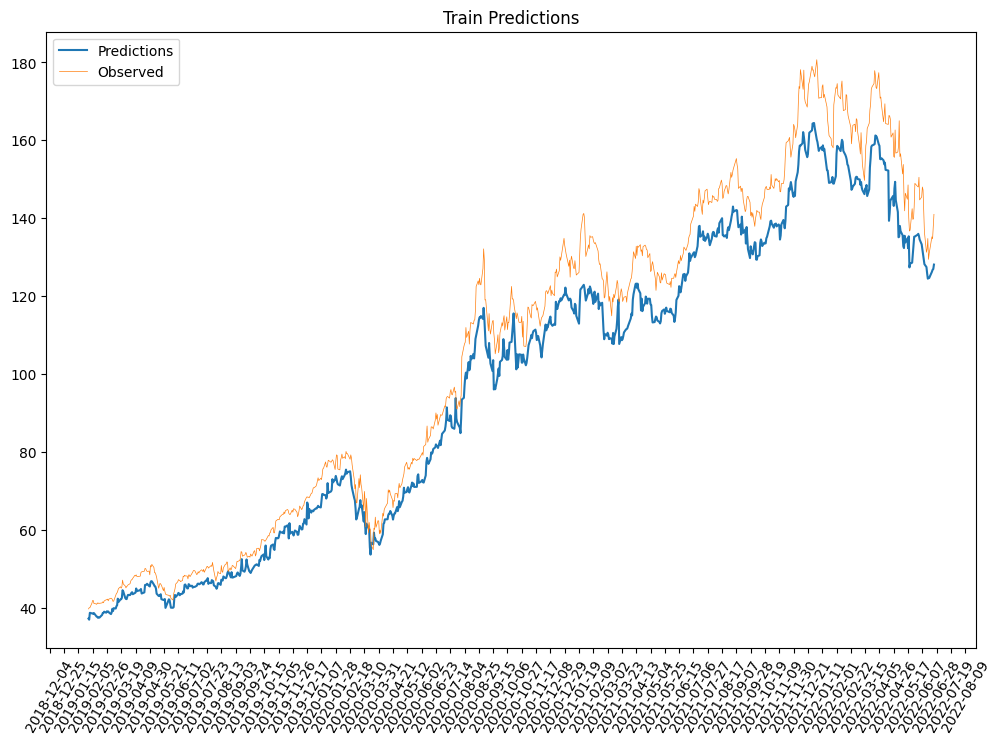

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

preds_train = pd.DataFrame({
    'Date': data_orig_final['date'][180:180+split_idx].reset_index(drop=True),
    'Predictions': x_pred,
    'Observed': data_orig_final['close_price_lagged'][:split_idx]
})

preds_train.to_csv('train_pred.csv')
!cp train_pred.csv "$path"

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Train Predictions')
ax.plot('Date', 'Predictions', data=preds_train, label='Predictions')
ax.plot('Date', 'Observed', data=preds_train, label='Observed', linewidth=0.5) # set alpha to 0.5 for the Observed line
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
ax.legend()
plt.show()

In [19]:
data_orig_final.shape

(1253, 40)

In [21]:
data_orig_final['date'][split_idx: data_orig_final.shape[0]-180]

858    2021-10-07
859    2021-10-08
860    2021-10-11
861    2021-10-12
862    2021-10-13
          ...    
1068   2022-08-09
1069   2022-08-10
1070   2022-08-11
1071   2022-08-12
1072   2022-08-15
Name: date, Length: 215, dtype: datetime64[ns]

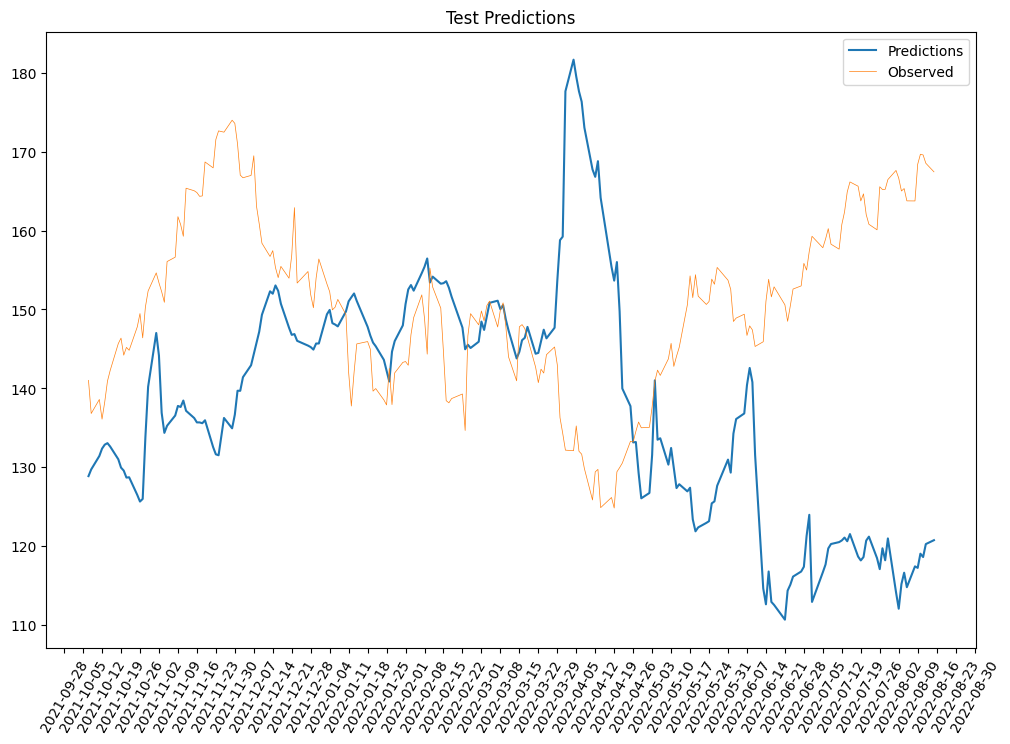

In [24]:
import matplotlib.pyplot as plt
preds_test = pd.DataFrame({
    'Date': data_orig_final['date'][split_idx: data_orig_final.shape[0]-180].reset_index(drop=True),
    'Predictions': y_pred,
    'Observed': data_orig_final['close_price_lagged'][split_idx: data_orig_final.shape[0]-180].reset_index(drop=True)
})

preds_test.to_csv('test_pred.csv')
!cp test_pred.csv "$path

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Test Predictions')
ax.plot('Date', 'Predictions', data=preds_test, label='Predictions')
ax.plot('Date', 'Observed', data=preds_test, label='Observed', linewidth=0.5) # set alpha to 0.5 for the Observed line
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.legend()
plt.show()

'cp' is not recognized as an internal or external command,
operable program or batch file.


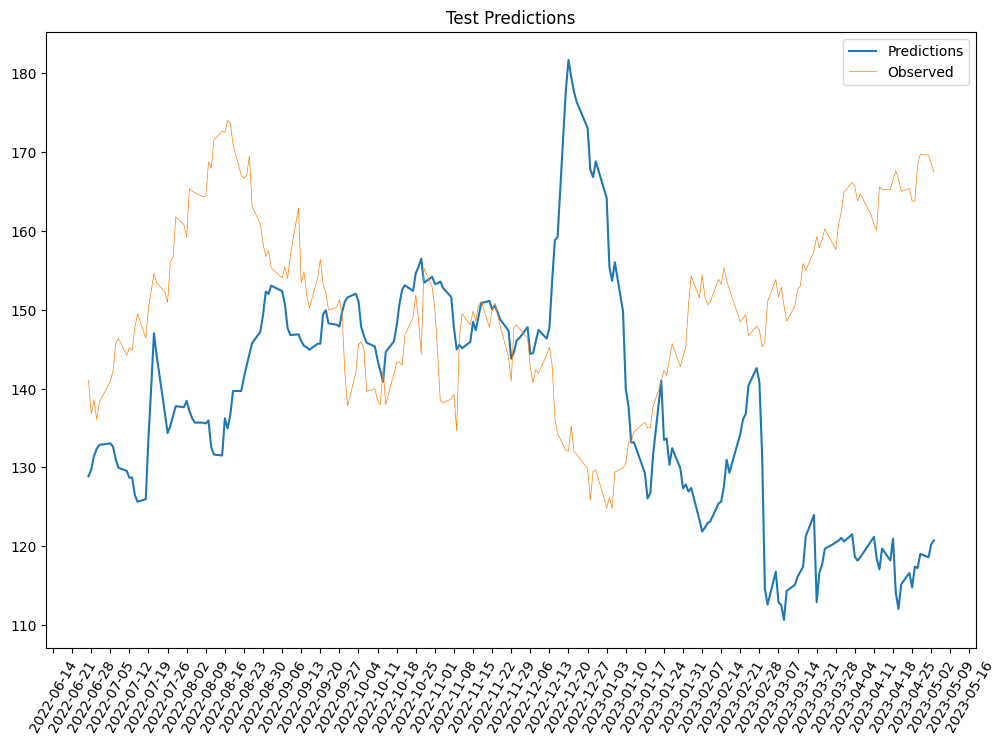

In [22]:
import matplotlib.pyplot as plt
preds_test = pd.DataFrame({
    'Date': data_orig_final['date'][split_idx+180: data_orig_final.shape[0]].reset_index(drop=True),
    'Predictions': y_pred,
    'Observed': data_orig_final['close_price_lagged'][split_idx+180: data_orig_final.shape[0]].reset_index(drop=True)
})

preds_test.to_csv('test_pred.csv')
!cp test_pred.csv "$path"

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Test Predictions')
ax.plot('Date', 'Predictions', data=preds_test, label='Predictions')
ax.plot('Date', 'Observed', data=preds_test, label='Observed', linewidth=0.5) # set alpha to 0.5 for the Observed line
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.legend()
plt.show()

In [ ]:
# Predict next 6 months
# Prepare the data
#Reshape X to match LSTM input shape
new_pred = model.predict(new_data_X)
new_pred = [x[0] for x in new_pred]
new_pred[:5]

In [ ]:
data_orig_final.head()

In [ ]:
new_data_original['Date']

In [ ]:
def get_trading_date(n, start_date_str):
    start_date = parser.parse(start_date_str)
    nyse = mcal.get_calendar('NYSE')
    # Get the next n trading days, excluding today
    next_n_days = nyse.valid_days(start_date=start_date + timedelta(days=1), end_date=start_date + timedelta(days=n*2))
    trading_days = next_n_days[:n]
    trading_days = [day.date().isoformat() for day in trading_days]
    return trading_days

In [ ]:
import matplotlib.pyplot as plt
new_preds = pd.DataFrame({
    'Date': get_trading_date(180, '2023-05-04'),
    'Predictions': new_pred,
})

new_preds.to_csv('new_preds.csv')
!cp new_preds.csv "$path"

fig, ax = plt.subplots(figsize=(12,8))
plt.title('Next 6 Months Predictions')
ax.plot('Date', 'Predictions', data=new_preds, label='Predictions')
plt.xticks(rotation=60)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.legend()
plt.show()

In [ ]:
date_new = pd.concat([appts_model['Date'], new_data['Date']], axis=0)
len_zeros = int(len(date_new)-len(appts_model['StudentName']))
observed_new = pd.concat([appts_model['StudentName'], pd.Series(np.zeros(len_zeros))], axis=0)
predictions_new = pd.concat([preds_train['Predictions'], preds_test['Predictions'], new_preds['Predictions']])

predictions_concat = pd.DataFrame({
    'Date': date_new,
    'Observed': observed_new,
    'Predictions': predictions_new
})

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Create a trace for the observed values
trace_observed = go.Scatter(x=predictions_concat['Date'], y=predictions_concat['Observed'], name='Observed')

# Create a trace for the predictions
trace_predictions = go.Scatter(x=predictions_concat['Date'], y=predictions_concat['Predictions'], name='Predictions')

# Create a layout for the graph
layout = go.Layout(
    title='Next 6 Months Predictions',
    xaxis=dict(title='Date', tickangle=60),
    yaxis=dict(title='Values'),
)

# Create a figure and add the traces and layout
fig = go.Figure(data=[trace_observed, trace_predictions], layout=layout)

# Show the graph
fig.show()